In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [4]:
# Gives us the no of cells with NA in each column

df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [5]:
# Its easier to work with numarical data then strings (int, float, bool)

df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [6]:
# To know if its string type or catagorical data

df["Seasons"].nunique(), df["Seasons"].unique()

(4, array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object))

In [7]:
# Converting Str to bool type using simple 1-hot encoding concept

df["is_Winter"] = df["Seasons"] == "Winter"
df["is_Spring"] = df["Seasons"] == "Spring"
df["is_Summer"] = df["Seasons"] == "Summer"
df["is_Autumn"] = df["Seasons"] == "Autumn"
df.drop("Seasons", inplace = True, axis = 1)
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,is_Winter,is_Spring,is_Summer,is_Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,True,False,False,False
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,True,False,False,False
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,True,False,False,False
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,True,False,False,False
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,True,False,False,False


In [8]:
df["Holiday"].nunique(), df["Holiday"].unique() 

(2, array(['No Holiday', 'Holiday'], dtype=object))

In [9]:
df["Functioning Day"].nunique(), df["Functioning Day"].unique()

(2, array(['Yes', 'No'], dtype=object))

In [10]:
# Since we have only 2 catagories, can be encoded in just 1 column

df["is_Holiday"] = df["Holiday"] == "Holiday"
df["is_Functioning_day"] = df["Functioning Day"] == "Yes"
df.drop(["Holiday", "Functioning Day"], inplace = True, axis = 1)
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,True,False,False,False,False,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,True,False,False,False,False,True


In [11]:
# A date has day 'd', month 'm' and year 'y'

class Date:
    def __init__(self, date):
        self.d = int(date[:2])
        self.m = int(date[3:5])
        self.y = int(date[6:])-1900

# To store number of days in all months from January to Dec.

monthDays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
 
# This function counts number of leap years since 1900.

def countLeapYears(date):

    years = date.y
 
    # Check if the current year needs to be considered
    # for the count of leap years or not
    if (date.m <= 2):
        years -= 1

    # An year is a leap year if it is a multiple of 4.
    # OR multiple of 400 AND not a multiple of 100.
    return int(years / 4) - int(years / 100) + int((years+300) / 400)

# This function returns number of days passed since 01/01/1900

def Date_to_int(date):
 
    # COUNT TOTAL NUMBER OF DAYS passed since 01/01/1900
    # initialize count using years and day
    days = date.y * 365 + date.d
 
    # Add days for months in given date
    for i in range(0, date.m - 1):
        days += monthDays[i]

    # Since every leap year is of 366 days,
    # Add a day for every leap year
    days += countLeapYears(date)

    return days-1

def weekday(date):
    
    # The days of week rotate on 7-day cycle.
    # 01/01/1900 was a Monday
    Days = {0: "MON",
            1: "TUE",
            2: "WED", 
            3: "THU", 
            4: "FRI",
            5: "SAT",
            6: "SUN"
           }
    return Days[Date_to_int(date)%7]

In [12]:
# Created 3 empty columns to break down Date Column into usefull data

df["Month"] = np.nan
df["Day"] = np.nan
df["int_date"] = np.nan

for i in range(len(df["Date"])):
    temp_date = Date(df["Date"][i])
    df["Month"][i] = temp_date.m
    df["Day"][i] = weekday(temp_date)
    df["int_date"][i] = Date_to_int(temp_date)

df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,FRI,43068.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,FRI,43068.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,True,False,False,False,False,True,12.0,FRI,43068.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,FRI,43068.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,FRI,43068.0


In [13]:
df['Day'].unique()

array(['FRI', 'SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU'], dtype=object)

In [14]:
df['Month'].unique()

array([12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [15]:
df['int_date'].unique()

array([43068., 43069., 43070., 43071., 43072., 43073., 43074., 43075.,
       43076., 43077., 43078., 43079., 43080., 43081., 43082., 43083.,
       43084., 43085., 43086., 43087., 43088., 43089., 43090., 43091.,
       43092., 43093., 43094., 43095., 43096., 43097., 43098., 43099.,
       43100., 43101., 43102., 43103., 43104., 43105., 43106., 43107.,
       43108., 43109., 43110., 43111., 43112., 43113., 43114., 43115.,
       43116., 43117., 43118., 43119., 43120., 43121., 43122., 43123.,
       43124., 43125., 43126., 43127., 43128., 43129., 43130., 43131.,
       43132., 43133., 43134., 43135., 43136., 43137., 43138., 43139.,
       43140., 43141., 43142., 43143., 43144., 43145., 43146., 43147.,
       43148., 43149., 43150., 43151., 43152., 43153., 43154., 43155.,
       43156., 43157., 43158., 43159., 43160., 43161., 43162., 43163.,
       43164., 43165., 43166., 43167., 43168., 43169., 43170., 43171.,
       43172., 43173., 43174., 43175., 43176., 43177., 43178., 43179.,
      

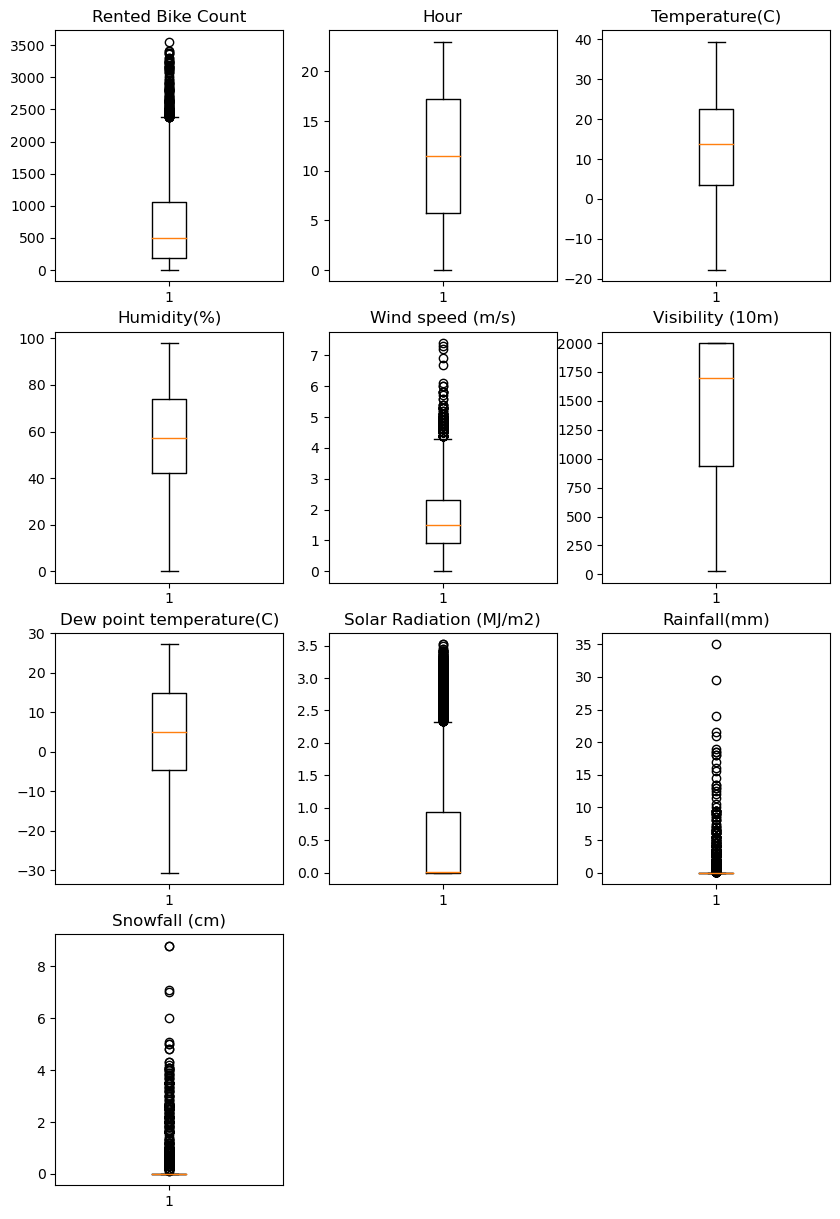

In [16]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(15)
titles = list(df.columns)

# To find outliers using box plots

for i in range(1, 11):
    plt.subplot(4, 3, i)
    plt.boxplot(df[df.columns[[i]]])
    plt.title(titles[i])

The columns with too many outliers are basically crowded with int(0)'s and that has overwelming effect on outlier detection. Thus 0's are droped and coulmns are rechecked for outliers

In [17]:
col = [[],[],[],[],[]]
col[0] = np.setdiff1d(np.array(df["Rented Bike Count"]), [0])
col[1] = np.setdiff1d(np.array(df["Wind speed (m/s)"]), [0])
col[2] = np.setdiff1d(np.array(df["Solar Radiation (MJ/m2)"]), [0])
col[3] = np.setdiff1d(np.array(df["Rainfall(mm)"]), [0])
col[4] = np.setdiff1d(np.array(df["Snowfall (cm)"]), [0])

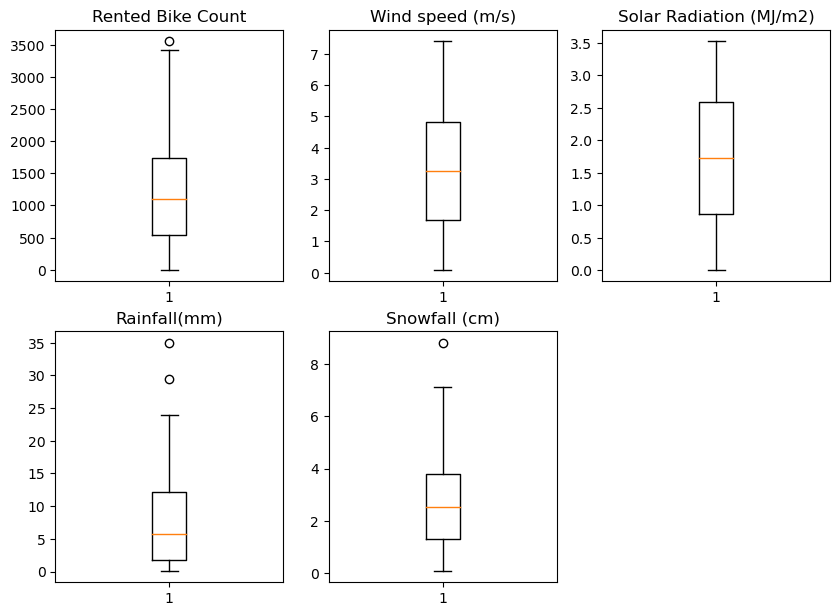

In [18]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(15)
titles = list(df.columns)

for i in range(1, 6):
    plt.subplot(4, 3, i)
    plt.boxplot(col[i-1])
    if i == 1:
        plt.title("Rented Bike Count")
    elif i == 2:
        plt.title("Wind speed (m/s)")
    else :
         plt.title(titles[i+5])

Even though the data does have a couple of outliers. they dont seem to be too out of range. Logically thinking, its more statistically possible that these values are not outliers. Thus to ensure the integrety of the data these outliers will be treated as true values.

In [22]:
df['Month'].unique()

array([12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [23]:
df['Day'].unique()

array(['FRI', 'SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU'], dtype=object)

In [24]:
df['Day'] = df['Day'].apply(lambda x : 1 if (x=='SAT' or x=='SUN') else 0 )

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  is_Winter                 8760 non-null   bool   
 12  is_Spring                 8760 non-null   bool   
 13  is_Summer                 8760 non-null   bool   
 14  is_Autum

In [26]:
df['Day'].unique()

array([0, 1])

In [27]:
df.drop(columns=['Date'],inplace=True)

In [28]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


<AxesSubplot:>

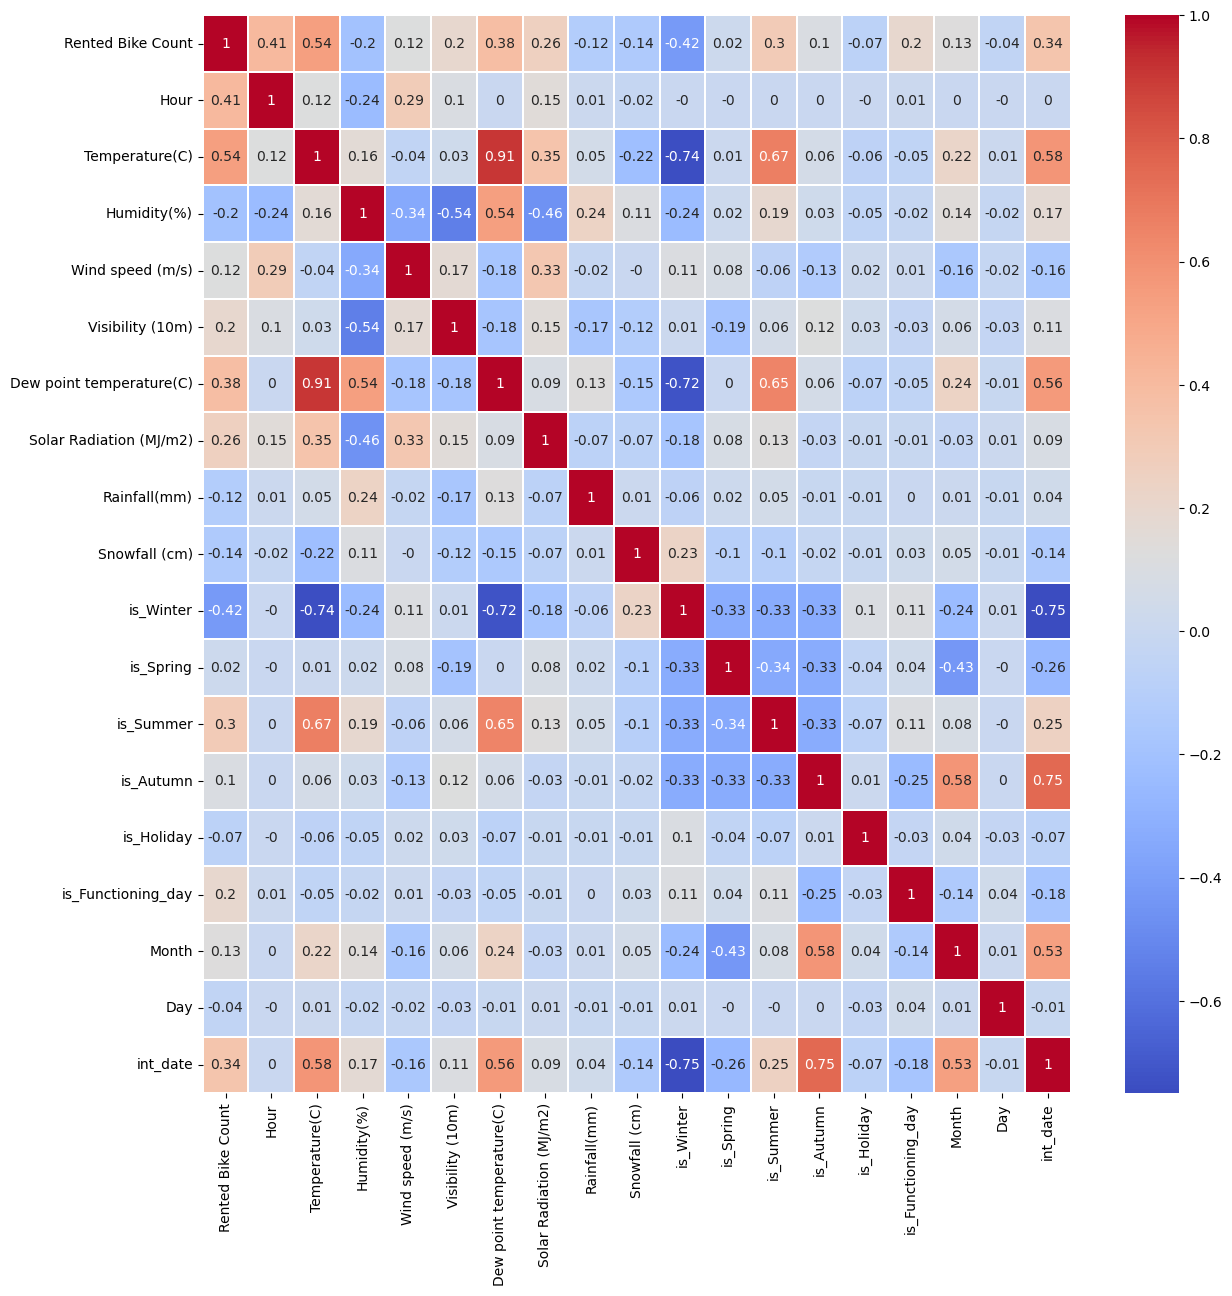

In [29]:
import seaborn as sns
data_corr= np.round(df.corr(), 2)      
plt.figure(figsize=(14,14))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

The features Temperature and dew point temperature are highly correlated features , so selecting all features not useful , so selecting a feature from them.

In [30]:
df.drop(columns=['Dew point temperature(C)'],inplace=True)

In [32]:
#saving into clenaed csv file
df.to_csv("Group_5_data_cleaned.csv")